# Introduction to Regression with Neural Netowrks in TensorFlow

There are many definitions for a regression problem but  in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter ... predicting a number.

In [37]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.9.0


## Creating data to view and fit

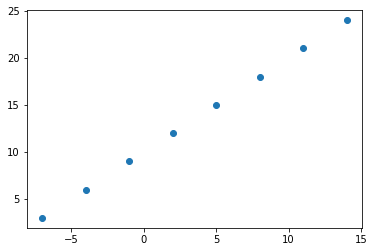

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y);

In [39]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [40]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [41]:
X[0], y[0]

(-7.0, 3.0)

In [42]:
X[1], y[1]

(-4.0, 6.0)

In [43]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [44]:
X[0].ndim

0

In [45]:
X[0], y[0]

(-7.0, 3.0)

In [46]:
input_shape = X[0].shape
input_shape

()

In [47]:
# Turn or NumPy array into tensors
X = tf.constant(X)
y = tf.constant(y)

X.shape, y.shape

X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [48]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequencial API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.MAE,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 505ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 10.9748 - mae: 10.9748


In [49]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [50]:
# Try and make a predicition using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 98ms/step


array([[12.716021]], dtype=float32)

In [51]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [52]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 571ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================]

1/1 [==============================] - 0s 4ms/step - loss: 6.9544 - mae: 6.9544
Epoch 89/100
1/1 [==============================] - 0s 6ms/step - loss: 6.9488 - mae: 6.9488
Epoch 90/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9431 - mae: 6.9431
Epoch 91/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9375 - mae: 6.9375
Epoch 92/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9319 - mae: 6.9319
Epoch 93/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9263 - mae: 6.9263
Epoch 94/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9206 - mae: 6.9206
Epoch 95/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9150 - mae: 6.9150
Epoch 96/100
1/1 [==============================] - 0s 6ms/step - loss: 6.9094 - mae: 6.9094
Epoch 97/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9038 - mae: 6.9038
Epoch 98/100
1/1 [==============================] - 0s 5ms/step - loss: 6.8981 - ma

In [53]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [54]:
# Let's see if our model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 68ms/step


array([[29.739855]], dtype=float32)

In [55]:
# Rebuild again the model

# 1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             metrics=["mae"])

# 3. Fitting the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 414ms/step - loss: 10.5736 - mae: 10.5736
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5731 - mae: 10.5731
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5727 - mae: 10.5727
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5722 - mae: 10.5722
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5718 - mae: 10.5718
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5713 - mae: 10.5713
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5709 - mae: 10.5709
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5704 - mae: 10.5704
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5700 - mae: 10.5700
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5695 - mae: 10.5695
Epoch 11/100
1/1 [==============================] - 0s 7

1/1 [==============================] - 0s 4ms/step - loss: 10.5349 - mae: 10.5349
Epoch 88/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5344 - mae: 10.5344
Epoch 89/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5340 - mae: 10.5340
Epoch 90/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5335 - mae: 10.5335
Epoch 91/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5331 - mae: 10.5331
Epoch 92/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5326 - mae: 10.5326
Epoch 93/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5322 - mae: 10.5322
Epoch 94/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5317 - mae: 10.5317
Epoch 95/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5313 - mae: 10.5313
Epoch 96/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5308 - mae: 10.5308
Epoch 97/100
1/1 [==============================] - 0s 4ms/step

In [56]:
model.predict([17.0])

1/1 [==============================] - 0s 82ms/step


array([[14.394114]], dtype=float32)

In [57]:
# Rebuild again by adding anotehr hidden layer, with 100 hidden units

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics=["mae"])

# 3. Fiting the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 527ms/step - loss: 14.2261 - mae: 14.2261
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 13.5328 - mae: 13.5328
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 12.8450 - mae: 12.8450
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 12.1611 - mae: 12.1611
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 11.4786 - mae: 11.4786
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.7953 - mae: 10.7953
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1084 - mae: 10.1084
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 9.4153 - mae: 9.4153
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 8.7133 - mae: 8.7133
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 7.9998 - mae: 7.9998
Epoch 11/100
1/1 [==============================] - 0s 8ms/ste

1/1 [==============================] - 0s 4ms/step - loss: 0.3949 - mae: 0.3949
Epoch 90/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2212 - mae: 0.2212
Epoch 91/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2634 - mae: 0.2634
Epoch 92/100
1/1 [==============================] - 0s 6ms/step - loss: 0.0835 - mae: 0.0835
Epoch 93/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2379 - mae: 0.2379
Epoch 94/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1928 - mae: 0.1928
Epoch 95/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2699 - mae: 0.2699
Epoch 96/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3601 - mae: 0.3601
Epoch 97/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2943 - mae: 0.2943
Epoch 98/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1065 - mae: 0.1065
Epoch 99/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1595 - ma

In [58]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 84ms/step


array([[27.138466]], dtype=float32)

## Evaluting the model

In practice, a typical workflow you'l go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```

When it comes to evaluation ... there are 3 words you should memorize:
    
    "Visualize, visualize, visualize"
    
It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predicitions of the model - how do the predictions of a model line up against the ground truth (the original labels)?


In [59]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [60]:
# Make labes for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

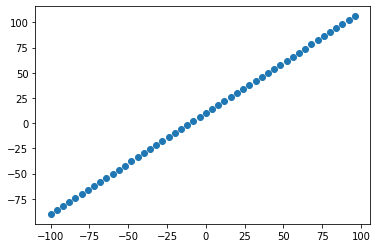

In [61]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X,y)

### The 3 sets ...

* **Training set** - the model learns from this data, which is typically 70 -80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10 -15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10 -15% of the total data available.

In [62]:
# Check the lenght of how many samples we have
len(X)

50

In [63]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20%% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_test), len(y_train)

(40, 10, 10, 40)

### Visualing the data

Now we're got out data in training and test sets ... let's visualize it again.

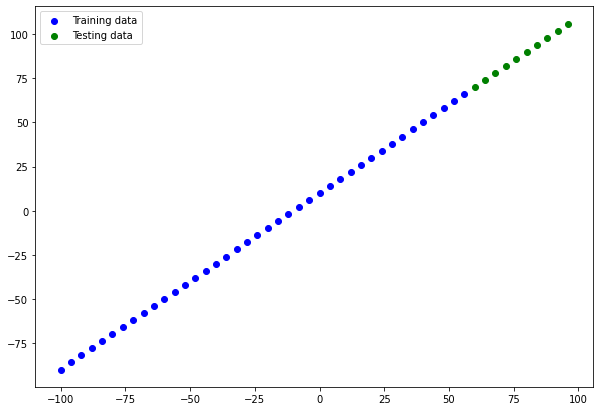

In [64]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")

#Show a legend
plt.legend()

In [65]:
# Let's have a look at how to build a neural network for our data

# !. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

3. # Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 26.4821 - mae: 26.4821
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 8.5605 - mae: 8.5605
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 10.7799 - mae: 10.7799
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 11.2394 - mae: 11.2394
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 12.4704 - mae: 12.4704
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.6435 - mae: 9.6435
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.7477 - mae: 8.7477
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0532 - mae: 9.0532
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 19.2073 - mae: 19.2073
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.3632 - mae: 10.3632
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - l

2/2 [==============================] - 0s 3ms/step - loss: 10.5054 - mae: 10.5054
Epoch 89/100
2/2 [==============================] - 0s 4ms/step - loss: 7.2276 - mae: 7.2276
Epoch 90/100
2/2 [==============================] - 0s 4ms/step - loss: 12.6327 - mae: 12.6327
Epoch 91/100
2/2 [==============================] - 0s 4ms/step - loss: 7.2740 - mae: 7.2740
Epoch 92/100
2/2 [==============================] - 0s 5ms/step - loss: 7.6332 - mae: 7.6332
Epoch 93/100
2/2 [==============================] - 0s 3ms/step - loss: 7.0966 - mae: 7.0966
Epoch 94/100
2/2 [==============================] - 0s 4ms/step - loss: 12.4845 - mae: 12.4845
Epoch 95/100
2/2 [==============================] - 0s 6ms/step - loss: 9.8591 - mae: 9.8591
Epoch 96/100
2/2 [==============================] - 0s 4ms/step - loss: 9.1368 - mae: 9.1368
Epoch 97/100
2/2 [==============================] - 0s 3ms/step - loss: 12.1120 - mae: 12.1120
Epoch 98/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0

### Visualizing the model

In [66]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])



In [68]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable parameters - there are the parameters(patterns) the model can update as it trains.
* Non-trainible params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

**Resources:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video. http://introtodeeplearning.com/

In [69]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/100
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 3ms/step - loss: 19.1086 - mae: 19.1086
Epoch 88/100
2/2 [==============================] - 0s 4ms/step - loss: 29.8228 - mae: 29.8228
Epoch 89/100
2/2 [==============================] - 0s 3ms/step - loss: 10.1742 - mae: 10.1742
Epoch 90/100
2/2 [==============================] - 0s 3ms/step - loss: 21.5240 - mae: 21.5240
Epoch 91/100
2/2 [==============================] - 0s 3ms/step - loss: 10.5716 - mae: 10.5716
Epoch 92/100
2/2 [==============================] - 0s 4ms/step - loss: 18.3977 - mae: 18.3977
Epoch 93/100
2/2 [==============================] - 0s 3ms/step - loss: 7.4138 - mae: 7.4138
Epoch 94/100
2/2 [==============================] - 0s 4ms/step - loss: 17.7380 - mae: 17.7380
Epoch 95/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1144 - mae: 11.1144
Epoch 96/100
2/2 [==============================] - 0s 4ms/step - loss: 19.4346 - mae: 19.4346
Epoch 97/100
2/2 [==============================] - 0s 3ms/step -

In [70]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [71]:
from tensorflow.keras.utils import plot_model

In [72]:
plot_model(model=model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [73]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 58ms/step


array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)

In [74]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

**Note:** if you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [75]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """
    Plots training data, test data and compares predictions to ground truth labels.
    """
    
    plt.figure(figsize=(10,7))
    # Plot trainign data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    #Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot model's predicitions in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # show the lagened
    plt.legend();

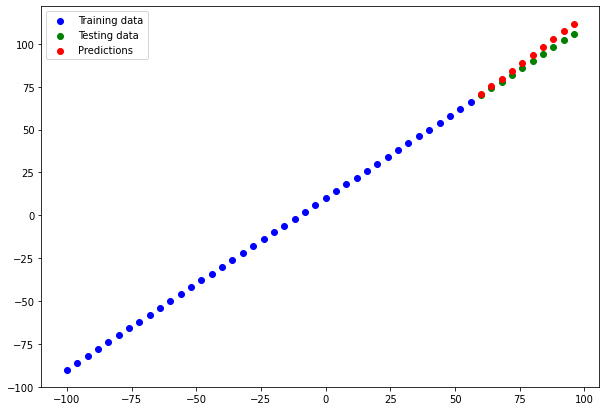

In [76]:
plot_predictions(train_data=X_train,
                train_labels=y_train,
                test_data=X_test,
                test_labels=y_test,
                predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics.

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* **MAE - mean absolute error**, "on average, how wrong is each of my model's predictions".
* **MSE - mean square error**, "square the average errors".

In [77]:
# Evaluate the model on the test 
model.evaluate(X_test,y_test)


1/1 [==============================] - 0s 223ms/step - loss: 3.1969 - mae: 3.1969


[3.1969382762908936, 3.1969382762908936]

In [78]:
# Calculate the mean absolute error
meanAE = tf.keras.losses.MAE(y_true=y_test,
                             y_pred=tf.constant(y_pred))
meanAE

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558252 , 14.1160555, 11.708944 , 10.336931 , 10.       ,
       10.698161 , 12.447113 , 15.332995 , 19.253975 , 23.84169  ],
      dtype=float32)>

In [79]:
#transform into a tensor
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)>

In [80]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [81]:
# remove one dimension from our tensor
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.552185,  75.13991 ,  79.72764 ,  84.315346,  88.90308 ,
        93.49081 ,  98.07852 , 102.666245, 107.253975, 111.84169 ],
      dtype=float32)>

In [82]:
# Calculate the mean absolute error

mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>

In [83]:
# Calculate the mean suare error
mse = tf.keras.losses.mse(y_true=y_test,
                  y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070127>

In [84]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true,
                                         y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.keras.losses.mse(y_true=y_true,
                              y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it-> evaluate-> tweak it -> fit it -> evaluate it ...```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships).
2. Make your model larger (using a more complex model) - this might come in the form of more layer or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.


Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

In [85]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>)

**Build `model_1`**

In [86]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Complile the model
model_1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1),y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 10.6389 - mae: 10.6389
Epoch 89/100
2/2 [==============================] - 0s 5ms/step - loss: 7.2667 - mae: 7.2667
Epoch 90/100
2/2 [==============================] - 0s 4ms/step - loss: 12.7786 - mae: 12.7786
Epoch 91/100
2/2 [==============================] - 0s 3ms/step - loss: 7.3481 - mae: 7.3481
Epoch 92/100
2/2 [==============================] - 0s 6ms/step - loss: 7.7175 - mae: 7.7175
Epoch 93/100
2/2 [==============================] - 0s 3ms/step - loss: 7.1263 - mae: 7.1263
Epoch 94/100
2/2 [==============================] - 0s 5ms/step - loss: 12.6190 - mae: 12.6190
Epoch 95/100
2/2 [==============================] - 0s 4ms/step - loss: 10.0912 - mae: 10.0912
Epoch 96/100
2/2 [==============================] - 0s 4ms/step - loss: 9.3558 - mae: 9.3558
Epoch 97/100
2/2 [==============================] - 0s 5ms/step - loss: 12.6834 - mae: 12.6834
Epoch 98/100
2/2 [==============================] - 0s 3ms/step - loss: 8

1/1 [==============================] - 0s 52ms/step


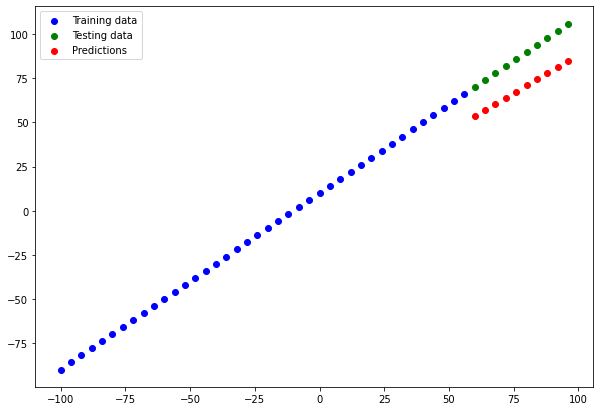

In [87]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [88]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test,y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [91]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 29.8935 - mse: 1334.8953
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 27.4055 - mse: 1106.8033
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 14.9463 - mse: 281.1076
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 40.4763 - mse: 2586.0088
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 27.8687 - mse: 1094.4380
Epoch 11/100
2/2 [==========================

2/2 [==============================] - 0s 3ms/step - loss: 15.2862 - mse: 315.3605
Epoch 87/100
2/2 [==============================] - 0s 4ms/step - loss: 19.1086 - mse: 521.2535
Epoch 88/100
2/2 [==============================] - 0s 3ms/step - loss: 29.8228 - mse: 1287.1902
Epoch 89/100
2/2 [==============================] - 0s 3ms/step - loss: 10.1742 - mse: 124.1342
Epoch 90/100
2/2 [==============================] - 0s 4ms/step - loss: 21.5240 - mse: 663.8608
Epoch 91/100
2/2 [==============================] - 0s 3ms/step - loss: 10.5716 - mse: 161.7467
Epoch 92/100
2/2 [==============================] - 0s 5ms/step - loss: 18.3977 - mse: 464.1323
Epoch 93/100
2/2 [==============================] - 0s 3ms/step - loss: 7.4138 - mse: 81.9820
Epoch 94/100
2/2 [==============================] - 0s 4ms/step - loss: 17.7380 - mse: 445.7377
Epoch 95/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1144 - mse: 164.0820
Epoch 96/100
2/2 [==============================] - 0s

1/1 [==============================] - 0s 24ms/step


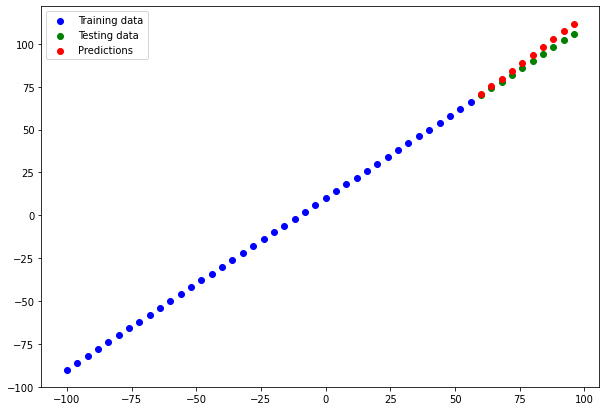

In [93]:
# Make an plot ppredictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [94]:
# Calculate model_2 evaluations metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [99]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 4ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/500
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 4ms/step - loss: 19.1086 - mae: 19.1086
Epoch 88/500
2/2 [==============================] - 0s 4ms/step - loss: 29.8228 - mae: 29.8228
Epoch 89/500
2/2 [==============================] - 0s 3ms/step - loss: 10.1742 - mae: 10.1742
Epoch 90/500
2/2 [==============================] - 0s 3ms/step - loss: 21.5240 - mae: 21.5240
Epoch 91/500
2/2 [==============================] - 0s 3ms/step - loss: 10.5716 - mae: 10.5716
Epoch 92/500
2/2 [==============================] - 0s 3ms/step - loss: 18.3977 - mae: 18.3977
Epoch 93/500
2/2 [==============================] - 0s 5ms/step - loss: 7.4138 - mae: 7.4138
Epoch 94/500
2/2 [==============================] - 0s 4ms/step - loss: 17.7380 - mae: 17.7380
Epoch 95/500
2/2 [==============================] - 0s 5ms/step - loss: 11.1144 - mae: 11.1144
Epoch 96/500
2/2 [==============================] - 0s 4ms/step - loss: 19.4346 - mae: 19.4346
Epoch 97/500
2/2 [==============================] - 0s 4ms/step -

2/2 [==============================] - 0s 6ms/step - loss: 16.5279 - mae: 16.5279
Epoch 174/500
2/2 [==============================] - 0s 4ms/step - loss: 11.2115 - mae: 11.2115
Epoch 175/500
2/2 [==============================] - 0s 5ms/step - loss: 27.5839 - mae: 27.5839
Epoch 176/500
2/2 [==============================] - 0s 6ms/step - loss: 8.2680 - mae: 8.2680
Epoch 177/500
2/2 [==============================] - 0s 4ms/step - loss: 9.2580 - mae: 9.2580
Epoch 178/500
2/2 [==============================] - 0s 5ms/step - loss: 18.1440 - mae: 18.1440
Epoch 179/500
2/2 [==============================] - 0s 4ms/step - loss: 10.5995 - mae: 10.5995
Epoch 180/500
2/2 [==============================] - 0s 3ms/step - loss: 7.8992 - mae: 7.8992
Epoch 181/500
2/2 [==============================] - 0s 4ms/step - loss: 17.4015 - mae: 17.4015
Epoch 182/500
2/2 [==============================] - 0s 5ms/step - loss: 11.0089 - mae: 11.0089
Epoch 183/500
2/2 [==============================] - 0s 5ms/

Epoch 259/500
2/2 [==============================] - 0s 5ms/step - loss: 8.6132 - mae: 8.6132
Epoch 260/500
2/2 [==============================] - 0s 4ms/step - loss: 43.0580 - mae: 43.0580
Epoch 261/500
2/2 [==============================] - 0s 3ms/step - loss: 18.4611 - mae: 18.4611
Epoch 262/500
2/2 [==============================] - 0s 6ms/step - loss: 6.8820 - mae: 6.8820
Epoch 263/500
2/2 [==============================] - 0s 7ms/step - loss: 13.7211 - mae: 13.7211
Epoch 264/500
2/2 [==============================] - 0s 4ms/step - loss: 21.0154 - mae: 21.0154
Epoch 265/500
2/2 [==============================] - 0s 5ms/step - loss: 19.3730 - mae: 19.3730
Epoch 266/500
2/2 [==============================] - 0s 5ms/step - loss: 11.4735 - mae: 11.4735
Epoch 267/500
2/2 [==============================] - 0s 5ms/step - loss: 7.5302 - mae: 7.5302
Epoch 268/500
2/2 [==============================] - 0s 5ms/step - loss: 21.6453 - mae: 21.6453
Epoch 269/500
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 5.6071 - mae: 5.6071
Epoch 345/500
2/2 [==============================] - 0s 4ms/step - loss: 37.4876 - mae: 37.4876
Epoch 346/500
2/2 [==============================] - 0s 4ms/step - loss: 16.8830 - mae: 16.8830
Epoch 347/500
2/2 [==============================] - 0s 5ms/step - loss: 12.8748 - mae: 12.8748
Epoch 348/500
2/2 [==============================] - 0s 5ms/step - loss: 8.1960 - mae: 8.1960
Epoch 349/500
2/2 [==============================] - 0s 4ms/step - loss: 13.5568 - mae: 13.5568
Epoch 350/500
2/2 [==============================] - 0s 5ms/step - loss: 15.4354 - mae: 15.4354
Epoch 351/500
2/2 [==============================] - 0s 4ms/step - loss: 32.9626 - mae: 32.9626
Epoch 352/500
2/2 [==============================] - 0s 4ms/step - loss: 14.2040 - mae: 14.2040
Epoch 353/500
2/2 [==============================] - 0s 4ms/step - loss: 15.9196 - mae: 15.9196
Epoch 354/500
2/2 [==============================] - 0s 5m

Epoch 430/500
2/2 [==============================] - 0s 4ms/step - loss: 11.4007 - mae: 11.4007
Epoch 431/500
2/2 [==============================] - 0s 4ms/step - loss: 10.6153 - mae: 10.6153
Epoch 432/500
2/2 [==============================] - 0s 4ms/step - loss: 11.4582 - mae: 11.4582
Epoch 433/500
2/2 [==============================] - 0s 3ms/step - loss: 11.3851 - mae: 11.3851
Epoch 434/500
2/2 [==============================] - 0s 5ms/step - loss: 30.3986 - mae: 30.3986
Epoch 435/500
2/2 [==============================] - 0s 4ms/step - loss: 10.5052 - mae: 10.5052
Epoch 436/500
2/2 [==============================] - 0s 4ms/step - loss: 28.8810 - mae: 28.8810
Epoch 437/500
2/2 [==============================] - 0s 6ms/step - loss: 8.5916 - mae: 8.5916
Epoch 438/500
2/2 [==============================] - 0s 3ms/step - loss: 12.7378 - mae: 12.7378
Epoch 439/500
2/2 [==============================] - 0s 4ms/step - loss: 33.6754 - mae: 33.6754
Epoch 440/500
2/2 [=======================

1/1 [==============================] - 0s 97ms/step


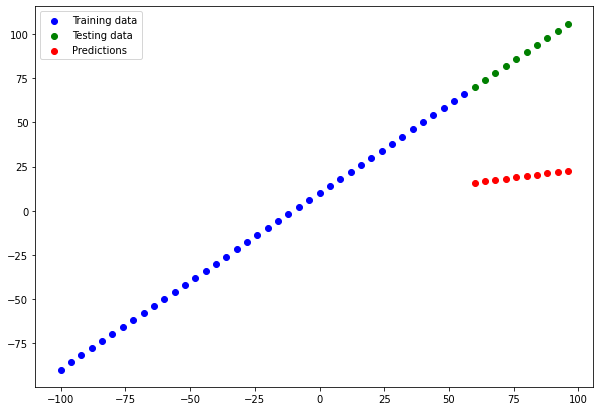

In [100]:
# Make a plot predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [101]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

**Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

### Comparing the results of our experiments

We're run a few experiments, let's compare the results.

In [102]:
# Let's compare our models's results using a pandas DataFrame
import pandas as pd

In [105]:
model_results =[["model_1", mae_1.numpy(), mse_1.numpy()],
               ["model_2", mae_2.numpy(), mse_2.numpy()],
               ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196940,13.070127
2,model_3,68.713615,4808.027344


Looks like `model_2` performed the best ...

In [107]:
model_2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                20        
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work, Remember the machine learning practioner's motto: **"experiment, experiment, experiment"**.

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

**Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).


## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are 2 main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [108]:
# Save model using the SavedModel format
model_2.save("model_SavedModel_format")

INFO:tensorflow:Assets written to: model_SavedModel_format\assets


In [109]:
# Save model using the HDF5 format (Hierachical Data Format)
model_2.save("model_HDF5_format.h5")